#Encontro 03 - Histrograma e variáveis quantitativas

**Preparo Prévio:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas.
2. 10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3. Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html

**Hoje:**
1. Explorar também as variáveis quantitativas do caso: Previsão de Risco de Inadimplência (Risco de Crédito) do Bank Loan. 
2. Construir tabelas de frequências e interpretar resultados considerando variáveis quantitativas de forma univariada e de forma cruzada com uma variável qualitativa. 
4. Explicar vantagens e desvantagens sobre o uso da frequência ou da densidade na construção de um histograma e saber interpretá-lo. 
5. Desenvolver contas para obtenção de mediana ou outros quantis a partir de tabelas de frequências. 
6. Fechamento do conteúdo.

**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 18 a 25; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1); pág. 116 e 117 (Definição 4.4 e Exemplo 4.8). 
2. Leitura prévia necessária: Montgomery et al (5ª. Edição): pág. 24 a 28.
3. 10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
4. Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html

Nessa aula, manteremos com a análise descritiva na base de dados do Bank Loan, entretanto, com olhar especial nas variáveis quantitativas. Abra a base de dados BankLoan.txt.gz e relembre quais são as variáveis quantitativas. 

In [1]:
import pandas as pd
import os

print("Estamos trabalhando no diretório")
os.getcwd()
#Se precisar mudar seu diretório
#os.chdir('C:/Users/Marcelo/Dropbox/')



Estamos trabalhando no diretório


'/Users/mirwox/Dropbox/Insper/2015/Courses/DataScience/Ciência dos dados/Encontro 03'

In [2]:
dados = pd.read_table('BankLoan.txt.gz', compression="gzip")

In [3]:
%matplotlib inline

In [4]:
dados

,ID,IDADE,EDUCACAO,TEMPO_EMP,TEMPO_END,RENDA,DIVIDA_CC,OUTRAS_DIV,GRAU_ENDIV,DEFAULT
0,1,41,3,18,7,176,11.359,5.009,10.3,1
1,2,27,1,10,6,31,1.362,4.001,17.3,0
2,3,40,1,15,14,55,0.856,2.169,5.5,0
3,4,41,1,15,14,120,2.659,0.821,2.9,0
4,5,24,2,2,0,28,1.787,3.057,17.3,1
5,6,41,2,5,5,25,0.393,2.157,10.2,0
6,7,39,1,20,9,67,3.834,16.668,30.6,0
7,8,43,1,12,11,38,0.129,1.239,3.6,0
8,9,24,1,3,4,19,1.358,3.278,24.4,1
9,10,36,1,0,13,25,2.778,2.147,19.7,0


Vamos converter as colunas _EDUCACAO_ e _DEFAULT_ para dados categóricos e mudar os rótulos das categorias

In [5]:
dados.EDUCACAO = dados.EDUCACAO.astype('category', ordered=True)
dados.EDUCACAO.cat.categories = ('Analfabeto', '1o. Grau', '2o. Grau', 'Graduacao', 'Pos-Graduacao')

dados.DEFAULT = dados.DEFAULT.astype('category', ordered=True)
dados.DEFAULT.cat.categories = ('Adimplente', 'Inadimplente')

Assim como já foi feito com as variáveis qualitativas nas aulas anteriores, também é possível iniciar uma análise exploratória de variáveis quantitativas por meio de construção de tabelas de frequências absolutas e relativas. 

Entretanto, aplicar o comando `value_counts` diretamente na variável quantitativa `IDADE` pode não ser muito útil dado o objetivo da análise descritiva.

Pense _o por quê_ e justifique! 

Escreva sua resposta aqui

Rode o `value_counts()` na coluna `IDADE` se achar necessário 

Explore a variável `IDADE` com o comando `describe` para ter uma visão geral sobre a variável.


Em seguida, o comando `cut` deixará a nova variável idade categorizada com seis níveis, sendo os quatro primeiros níveis com amplitude igual a 5 anos e dois últimos com amplitude 10.

In [6]:
idade = pd.cut(dados.IDADE, (20, 25, 30, 35, 40, 50, 60), False)
idade

0      [40, 50)
1      [25, 30)
2      [40, 50)
3      [40, 50)
4      [20, 25)
5      [40, 50)
6      [35, 40)
7      [40, 50)
8      [20, 25)
9      [35, 40)
10     [25, 30)
11     [25, 30)
12     [50, 60)
13     [35, 40)
14     [40, 50)
15     [35, 40)
16     [35, 40)
17     [40, 50)
18     [35, 40)
19     [40, 50)
20     [35, 40)
21     [40, 50)
22     [25, 30)
23     [25, 30)
24     [20, 25)
25     [25, 30)
26     [40, 50)
27     [40, 50)
28     [30, 35)
29     [25, 30)
         ...   
470    [25, 30)
471    [20, 25)
472    [40, 50)
473    [20, 25)
474    [35, 40)
475    [50, 60)
476    [25, 30)
477    [25, 30)
478    [50, 60)
479    [35, 40)
480    [40, 50)
481    [20, 25)
482    [30, 35)
483    [25, 30)
484    [40, 50)
485    [30, 35)
486    [25, 30)
487    [30, 35)
488    [35, 40)
489    [50, 60)
490    [30, 35)
491    [40, 50)
492    [25, 30)
493    [35, 40)
494    [25, 30)
495    [40, 50)
496    [30, 35)
497    [40, 50)
498    [25, 30)
499    [40, 50)
Name: IDADE, dtype: cate

1) Com as linhas de comando acima, a nova variável `idade` é definida como uma variável qualitativa. Construa as tabelas de frequências (absolutas e relativas) usando os comandos de forma similar ao feito na aula passada. 

In [7]:
# construa a tabela de frequências absolutas aqui

In [8]:
# construa a tabela de frequências relativas aqui

Ainda, responda: 

1.1. Interprete os resultados observando saída das duas tabelas construídas. O que estes dados querem dizer? Onde estão mais concentrados?

1.2. Dos 500 clientes que fazem parte da amostra, quantos são inadimplentes e tem entre 30 anos (inclusive) e 40 anos (exclusive)? 

1.3. Qual o percentual de clientes inadimplentes e entre [40,60) anos? 

1.4. Entre os inadimplentes, qual o percentual de clientes entre [20,25) anos? 

1.5. Entre clientes com 20 a 25 anos, qual o percentual de inadimplentes? E de adimplentes? 

1.6. A distribuição das frequências relativas da variável `idade` se altera segundo a variável `DEFAULT`? Justifique de forma clara sua resposta. Qual a importância dessa pergunta para o principal objetivo do problema? Justifique.

Assim como as tabelas de frequências, os histogramas têm como objetivo resumir os dados de variáveis quantitativas, só de maneira gráfica o que facilita na interpretação, comparação e compreensão da distribuição das frequências.

Com as linhas de comando a seguir, obtêm-se os gráficos apresentados abaixo:

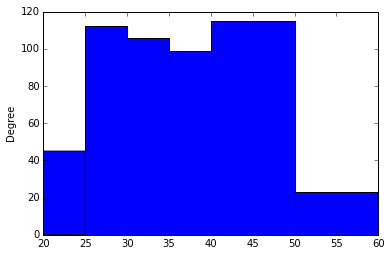

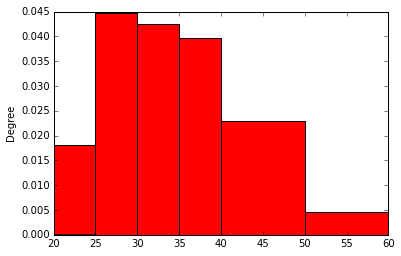

In [9]:
pd.DataFrame.plot(kind='hist', data=dados.IDADE, bins=(20, 25, 30, 35, 40, 50, 60), color=('blue'), legend=False)
pd.DataFrame.plot(kind='hist', data=dados.IDADE, bins=(20, 25, 30, 35, 40, 50, 60), color=('red'), normed=True, legend=False)

Esses gráficos expressam um resumo da variável `IDADE` utilizando as mesmas categorias da nova variável `idade`. O primeiro gráfico foi construído com as frequências absolutas no eixo das ordenadas e o segundo usa no eixo das ordenadas uma medidade de “densidade”.

2) Responda:

2.1. Esses gráficos são iguais? Ou seja, obtemos a mesma interpretação sobre o comportamento da variável `IDADE` quando se interpretam ambos? Justifique sua resposta. 



2.2. Qual a consequência da utilização da densidade para o histograma? A partir da **Tabela 1**, como deve ser feita a conta para obter o valor da densidade em cada faixa de idade?

Faixa de idade|Frequência absoluta|Frequência relativa|Densidade
-|-|-|-
[20,25)|45|0,090|
[25,30)|112|0,224|
[30,35)|106|0,212|
[35,40)|99|0,198|
[40,50)|115|0,230|
[50,60)|23|0,046|
Total|500|1|

<center>**Tabela 1**. Frequências absolutas e relativas da variável `IDADE`.</center>

2.3. Se os histogramas são construídos com faixas de idade todas de mesma amplitude (por exemplo, 5 anos), o que acontece com visual dos histogramas construídos quando utilizada a frequência absoluta e densidade? 

2.4. Construa um histograma para variável `IDADE` para cada categoria da variável `DEFAULT`. Interprete-os.

Além de apresentar as frequências absoluta e relativa para cada faixa de idade, a **Tabela 2** também apresenta a frequência relativa acumulada. Uma possível interpretação que utiliza essa frequência acumulada, útil em variáveis quantitativas, seria dizer que a maioria dos clientes (52,6% ) da amostra tem menos de 35 anos.

Faixa de idade|Frequência absoluta|Frequência relativa (%)|Frequência relativa acumulada (%)
-|-|-|-
[20,25)|45|9,0%|9,0% 
[25,30)|112|22,4%|31,4% 
[30,35)|106|21,2%|52,6% 
[35,40)|99|19,8%|72,4% 
[40,50)|115|23,0%|95,4% 
[50,60)|23|4,6%|100,0% 
Total|500|100%| 

<center>**Tabela 2.** Frequências absolutas, relativas e relativas acumuladas da variável `IDADE`.</center>

3) Considerando os resultados da Tabela 2 e o histogram de densidade, faça contas para determinar: 



3.1. Valor que divide os 50% mais jovens dos demais 50% (menos jovens). 

3.2. Menor idade entre os 25% clientes mais velhos. E a maior idade entre os 75% clientes mais jovens. 

3.3. Percentual de clientes com até 45 anos? 

3.4. Percentual de clientes acima de 37 anos?

Nesta aula, exploramos a variável `IDADE` utilizando algumas técnicas descritivas. Na base de dados do Bank Loan, há outras variáveis quantitativas que também poderiam ser exploradas.

